# Extract images of cars and not cars

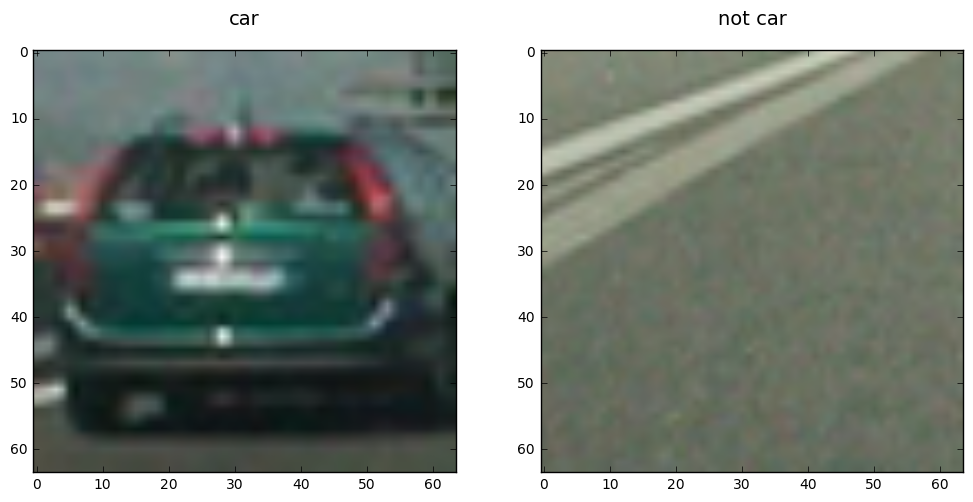

In [5]:
import glob
import matplotlib.image as mpimg
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


car_imgs = glob.glob('dataset/vehicles/GTI**/*.png')
notcar_imgs = glob.glob('dataset/non-vehicles/GTI**/*.png')


image_car = mpimg.imread(np.random.choice(car_imgs))
image_notcar = mpimg.imread(np.random.choice(notcar_imgs))

def show_images(*images,title=None):
    f, axes = plt.subplots(1,len(images), squeeze=False)
    f.set_size_inches((6 * len(images),8))
    if title and len(images)==1 and type(title) == str:
        title = [title]
    for i in range(len(images)):
        img = images[i]
        ax = axes[0][i]
        if title is not None:
            assert len(title) == len(images)
            t = title[i]
            ax.text(0.5, 1.05, t, transform=ax.transAxes, fontsize=14, verticalalignment='bottom', horizontalalignment='center')
        if len(img.shape) == 3:
            ax.imshow(img)
        else:
            ax.imshow(img, cmap="gray")
            
show_images(image_car, image_notcar , title=["car", "not car"])

# Generating HOG

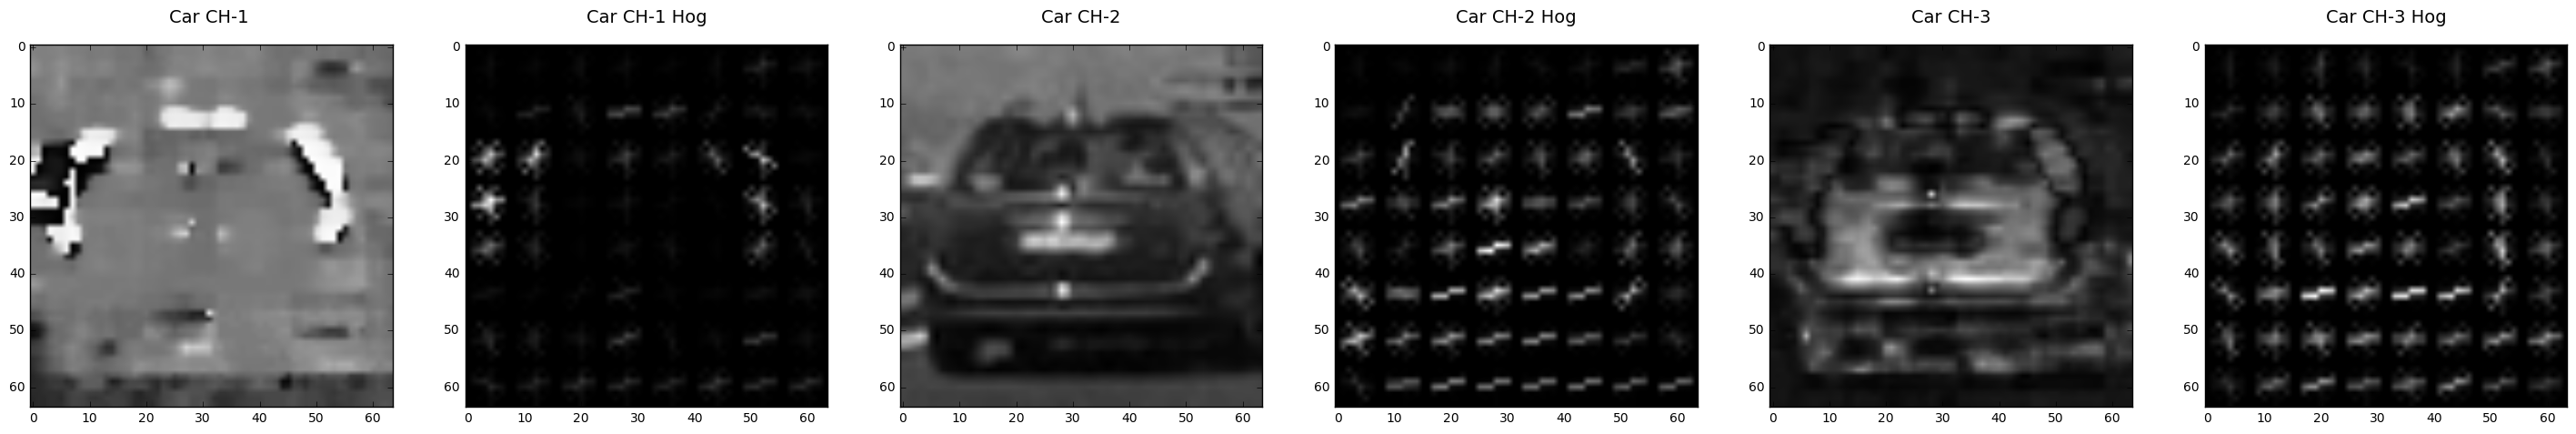

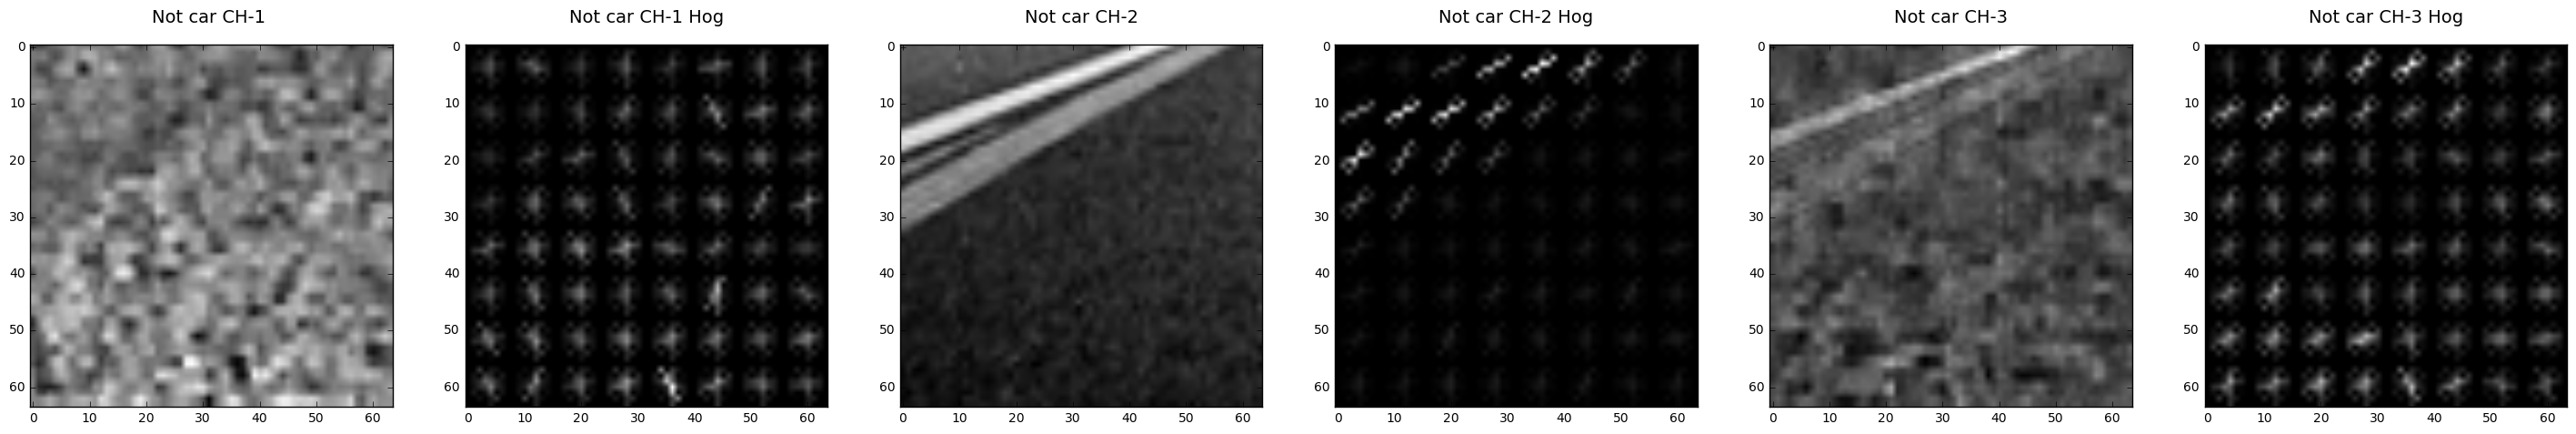

In [21]:
from utils import get_hog_features

orient = 9  # HOG orientations
pix_per_cell = 8  # HOG pixels per cell
cell_per_block = 2  # HOG cells per block
hog_channel = "ALL"  # Can be 0, 1, 2, or "ALL"

# car HLS colorspace
image_car_colorspace = cv2.cvtColor(image_car, cv2.COLOR_RGB2HLS)

# extract hog from car image
car_hog_features = []
for channel in range(image_car_colorspace.shape[2]):
     car_hog_features.append(get_hog_features(image_car_colorspace[:,:,channel], orient, pix_per_cell, cell_per_block,
                     vis=True, feature_vec=True))
        
# not car HLS colorspace
image_notcar_colorspace = cv2.cvtColor(image_notcar, cv2.COLOR_RGB2HLS)

# extract hog from not car image
notcar_hog_features = []
for channel in range(image_notcar_colorspace.shape[2]):
     notcar_hog_features.append(get_hog_features(image_notcar_colorspace[:,:,channel], orient, pix_per_cell, cell_per_block,
                     vis=True, feature_vec=True))

show_images(image_car_colorspace[:,:,0], car_hog_features[0][1],
            image_car_colorspace[:,:,1], car_hog_features[1][1], 
            image_car_colorspace[:,:,2], car_hog_features[2][1],             
            title=["Car CH-1 ", "Car CH-1 Hog", "Car CH-2", "Car CH-2 Hog", "Car CH-3", "Car CH-3 Hog"])

show_images(image_notcar_colorspace[:,:,0], notcar_hog_features[0][1],
            image_notcar_colorspace[:,:,1], notcar_hog_features[1][1], 
            image_notcar_colorspace[:,:,2], notcar_hog_features[2][1],             
            title=["Not car CH-1 ", "Not car CH-1 Hog", "Not car CH-2", "Not car CH-2 Hog", "Not car CH-3", "Not car CH-3 Hog"])
                                      